<a href="https://colab.research.google.com/github/GANYMEDEBANK/Features/blob/main/PCA_and_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"nazmulislam1803029","key":"b1c362bc793175237021a8fffe911213"}'}

In [68]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-data-for-ml-course


mkdir: cannot create directory ‘/root/.kaggle’: File exists
home-data-for-ml-course.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
!unzip home-data-for-ml-course.zip

Archive:  home-data-for-ml-course.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA

In [71]:
main_df = pd.read_csv("/content/train.csv")

In [72]:
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
y = main_df.SalePrice
X = main_df.drop("SalePrice", axis  = 1)
X = main_df.drop("Id", axis  = 1)

In [74]:
# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)

In [75]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == "object"]

In [76]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [77]:
# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X = X[my_cols].copy()

In [78]:
X.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,61,0,0,0,0,0,2,2008,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,298,0,0,0,0,0,0,5,2007,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,42,0,0,0,0,0,9,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,0,35,272,0,0,0,0,2,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,192,84,0,0,0,0,0,12,2008,250000


In [79]:
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

In [80]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [81]:
drop_X = X.select_dtypes(exclude=['object'])

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(drop_X, y, test_size = 0.2, random_state = 0)

In [83]:
score_dataset(X_train, X_valid, y_train, y_valid)

909.0415068493146

In [84]:
# Make copy to avoid changing original data 
label_X = X.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(label_X, y, test_size = 0.2, random_state = 0)
score_dataset(X_train, X_valid, y_train, y_valid)

881.2459246575335

#PCA

In [86]:
scaled_X = StandardScaler().fit_transform(label_X)
y = y.values.reshape(-1,1)
scaled_y = StandardScaler().fit_transform(y)
X_train, X_valid, y_train, y_valid = train_test_split(scaled_X, scaled_y, test_size = 0.2, random_state = 0)
score_dataset(X_train, X_valid, y_train, y_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.01117928952990033

In [87]:
pca = PCA(n_components = 4)


In [88]:
pca.fit(scaled_X)

PCA(n_components=4)

In [89]:
X_pca = pca.transform(scaled_X)

In [90]:
scaled_X.shape

(1460, 58)

In [91]:
X_pca.shape

(1460, 4)

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pca, scaled_y, test_size = 0.2, random_state = 0)
score_dataset(X_train, X_valid, y_train, y_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.2181315224812059

#LASSO


In [93]:
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
X = main_df.drop("SalePrice", axis = 1)
y = main_df["SalePrice"]

In [95]:
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X = X.select_dtypes(exclude=['object'])

In [96]:
col_name  = X.columns
print(col_name)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [97]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


In [98]:
lasso = Lasso(alpha = 0.1 )
lasso_coef = lasso.fit(X,y).coef_

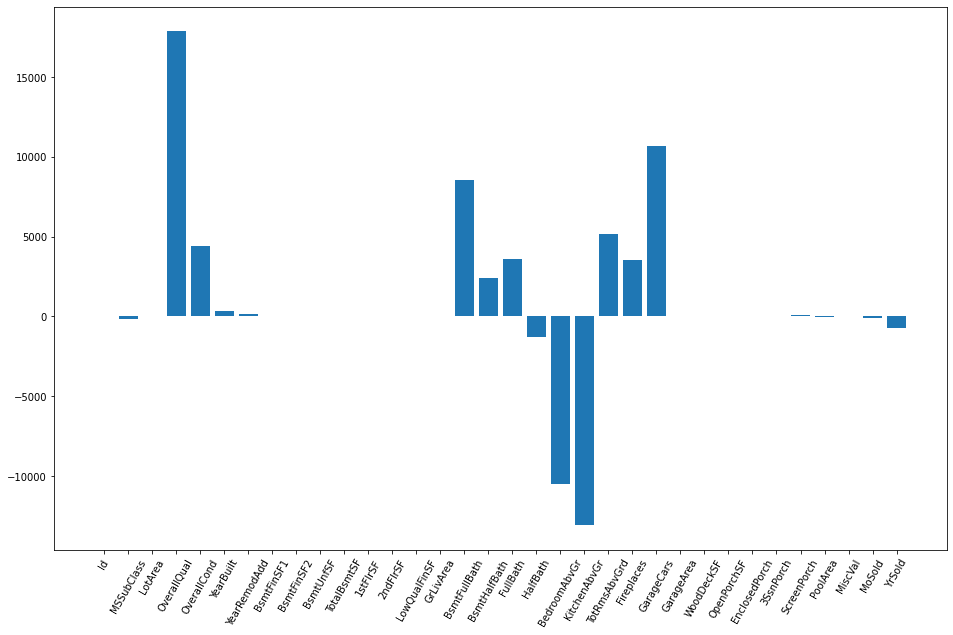

In [99]:
plt.figure(figsize = (16,10))
_=plt.bar(range(len(col_name)), lasso_coef)
_=plt.xticks(range(len(col_name)),col_name, rotation = 60)